# Build data structure and load data

**Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize': (50, 30), 'figure.dpi': 100, 'font.size': 10}) # Set default font, fig size
#plt.rcParams['font.size'] = 10 # Set default fontsize

print("Pandas", pd.__version__)
print("Numpy", np.__version__)
print("Seaborn", sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


In [2]:
%matplotlib inline

## Get data 

### Mobility data


**"destino" field used for ext/int trips**

In [3]:
# para gemnerar los primeros datos
datos_mitma = pd.read_csv('~/Trabajo_tfm/datos_csv/mobility_ext.csv')
                          #index_col='Unnamed: 0')# salvado por eda_m1 con fecha como indice
datos_mitma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 7077 non-null   object 
 1   provincia             7077 non-null   object 
 2   v_muy_cortos          7077 non-null   float64
 3   v_cortos              7077 non-null   float64
 4   v_medios              7077 non-null   float64
 5   v_largos              7077 non-null   float64
 6   v_noche               7077 non-null   float64
 7   v_madrugada           7077 non-null   float64
 8   v_mañana              7077 non-null   float64
 9   v_mediodia            7077 non-null   float64
 10  v_sobremesa           7077 non-null   float64
 11  v_tarde               7077 non-null   float64
 12  v_km_muy_cortos       7077 non-null   float64
 13  v_km_cortos           7077 non-null   float64
 14  v_km_medios           7077 non-null   float64
 15  v_km_largos          

In [4]:
datos_mitma.head()

,fecha,provincia,v_muy_cortos,v_cortos,v_medios,v_largos,v_noche,v_madrugada,v_mañana,v_mediodia,...,vext_km_noche,vext_km_madrugada,vext_km_mañana,vext_km_mediodia,vext_km_sobremesa,vext_km_tarde,cero_viajes,un_viaje,dos_viajes,mas_de_dos_viajes
0,2020-03-01,ALICANTE,1.322250e+09,804633464.0,222461316.0,39322732.0,264283976.0,177396270.0,440969068.0,558244320.0,...,2.588726e+09,3.923355e+09,1.252925e+10,1.565224e+10,1.667656e+10,4.635016e+09,851314297.0,150474759.0,412014689.0,664243655.0
1,2020-03-01,ALMERIA,4.137365e+08,307464963.0,197629520.0,65431700.0,100438393.0,76635719.0,176872853.0,228715016.0,...,1.615540e+09,2.223428e+09,6.993912e+09,8.703933e+09,1.152187e+10,2.948829e+09,415455807.0,107652858.0,198521970.0,341563750.0
2,2020-03-01,BADAJOZ,5.620126e+08,292754287.0,228679981.0,132586257.0,134096187.0,84005893.0,208940004.0,285336738.0,...,1.912023e+09,3.451396e+09,9.512004e+09,1.368057e+10,1.689393e+10,4.314848e+09,812586622.0,135606609.0,288980489.0,403386675.0
3,2020-03-01,CADIZ,1.139626e+09,762263188.0,170314872.0,37096003.0,243768978.0,155137510.0,317798225.0,491238893.0,...,1.544056e+09,2.501498e+09,7.486108e+09,1.151443e+10,1.393903e+10,3.779070e+09,432012556.0,103931646.0,280562124.0,534378515.0
4,2020-03-01,CIUDAD_REAL,4.181868e+08,131185519.0,92363723.0,71743512.0,83422745.0,53835197.0,120480037.0,170562465.0,...,1.241544e+09,1.845293e+09,5.946952e+09,9.717944e+09,1.376540e+10,2.629732e+09,480789793.0,92961056.0,183044093.0,216088434.0


### Climate data

In [5]:
datos_clima = pd.read_csv('~/Trabajo_tfm/datos_csv/clima_extendido.csv')

datos_clima.head()

,fecha,provincia,altitud,velmedia,tmin,tmed,tmax,presMin,presMax,sol,prec,ha,psat,hr,vol_min,vol_max,delta_V,delta_P,delta_T
0,2020-03-01,ALICANTE,43,3.1,12.6,17.6,22.6,1007.2,1012.5,7.0,0.0,0.197708,10.255118,64.0,2.870123,2.885226,0.015103,5.3,10.0
1,2020-03-01,ALMERIA,21,3.6,12.9,16.8,20.6,1011.9,1015.0,5.0,0.0,0.115960,10.032146,66.0,2.855172,2.863919,0.008747,3.1,7.7
2,2020-03-01,BADAJOZ,185,3.1,11.2,14.6,17.9,990.0,995.8,1.6,3.8,0.218616,9.436858,67.0,2.888130,2.905051,0.016920,5.8,6.7
3,2020-03-01,CADIZ,2,2.2,15.1,17.3,19.5,1018.8,1022.7,1.9,0.0,0.145634,10.171093,87.0,2.838565,2.849431,0.010866,3.9,4.4
4,2020-03-01,CIUDAD_REAL,628,3.6,9.4,12.4,15.4,939.0,945.6,2.2,6.0,0.250686,8.867330,62.0,3.018190,3.039404,0.021214,6.6,6.0


In [6]:
datos_clima = datos_clima.drop(columns='provincia', axis=1)
datos_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     7077 non-null   object 
 1   altitud   7077 non-null   int64  
 2   velmedia  7077 non-null   float64
 3   tmin      7077 non-null   float64
 4   tmed      7077 non-null   float64
 5   tmax      7077 non-null   float64
 6   presMin   7077 non-null   float64
 7   presMax   7077 non-null   float64
 8   sol       7077 non-null   float64
 9   prec      7077 non-null   float64
 10  ha        7077 non-null   float64
 11  psat      7077 non-null   float64
 12  hr        7077 non-null   float64
 13  vol_min   7077 non-null   float64
 14  vol_max   7077 non-null   float64
 15  delta_V   7077 non-null   float64
 16  delta_P   7077 non-null   float64
 17  delta_T   7077 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 995.3+ KB


In [7]:
datos_0 = pd.concat([datos_mitma, datos_clima], axis=1)
datos_0.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [8]:
datos_0 = datos_0.T.drop_duplicates().T #datos_0 = datos_mitma.T.drop_duplicates().T

In [9]:
datos_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fecha                 7077 non-null   object
 1   provincia             7077 non-null   object
 2   v_muy_cortos          7077 non-null   object
 3   v_cortos              7077 non-null   object
 4   v_medios              7077 non-null   object
 5   v_largos              7077 non-null   object
 6   v_noche               7077 non-null   object
 7   v_madrugada           7077 non-null   object
 8   v_mañana              7077 non-null   object
 9   v_mediodia            7077 non-null   object
 10  v_sobremesa           7077 non-null   object
 11  v_tarde               7077 non-null   object
 12  v_km_muy_cortos       7077 non-null   object
 13  v_km_cortos           7077 non-null   object
 14  v_km_medios           7077 non-null   object
 15  v_km_largos           7077 non-null   

### Covid data

In [10]:
evolucion = pd.read_csv('~/Trabajo_tfm/datos_csv/covid_preprocesado.csv',index_col='Unnamed: 0')
evolucion.head()

,fecha,provincia,poblacion,num_casos
0,2020-03-01,ALICANTE,1858683.0,0.0
1,2020-03-01,ALMERIA,716820.0,0.0
2,2020-03-01,BADAJOZ,673559.0,2.0
3,2020-03-01,CADIZ,1240155.0,0.0
4,2020-03-01,CIUDAD_REAL,495761.0,0.0


In [11]:
evolucion = evolucion.drop(columns='provincia', axis=1)

In [12]:
datos_1 = pd.concat([datos_0, evolucion], axis=1)

In [13]:
datos_1.provincia

0          ALICANTE
1           ALMERIA
2           BADAJOZ
3             CADIZ
4       CIUDAD_REAL
           ...     
7072      SALAMANCA
7073        SEVILLA
7074       VALENCIA
7075         ZAMORA
7076       ZARAGOZA
Name: provincia, Length: 7077, dtype: object

In [14]:
datos_1 = datos_1.T.drop_duplicates().T #datos_0 = datos_mitma.T.drop_duplicates().T

In [15]:
for columna in datos_1.columns:
    if not(columna == 'fecha' or columna== 'provincia'):
        #print('Columna: ' + columna)
        datos_1[columna] = datos_1[columna].astype(np.float64)

In [16]:
datos_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 7077 non-null   object 
 1   provincia             7077 non-null   object 
 2   v_muy_cortos          7077 non-null   float64
 3   v_cortos              7077 non-null   float64
 4   v_medios              7077 non-null   float64
 5   v_largos              7077 non-null   float64
 6   v_noche               7077 non-null   float64
 7   v_madrugada           7077 non-null   float64
 8   v_mañana              7077 non-null   float64
 9   v_mediodia            7077 non-null   float64
 10  v_sobremesa           7077 non-null   float64
 11  v_tarde               7077 non-null   float64
 12  v_km_muy_cortos       7077 non-null   float64
 13  v_km_cortos           7077 non-null   float64
 14  v_km_medios           7077 non-null   float64
 15  v_km_largos          

# Save data : tarjeta_datos_3

In [17]:
contenedor = datos_1['fecha']
datos_1['fecha'] = pd.to_datetime(contenedor)
datos_1.set_index('fecha', inplace=True)
# tarjeta.index #check datatype of index

In [18]:
datos_1.to_csv("~/Trabajo_tfm/datos_csv/tarjeta_datos_3.csv")

# Correlation analysis

In [19]:
#datos = tarjeta_datos.drop(columns=['num_casos'], axis=1).select_dtypes(exclude=['object']).copy()
datos = datos_1.select_dtypes(exclude=['object']).copy()

#datos['fecha'] = pd.to_datetime(datos['fecha'], format='%Y/%m/%d')

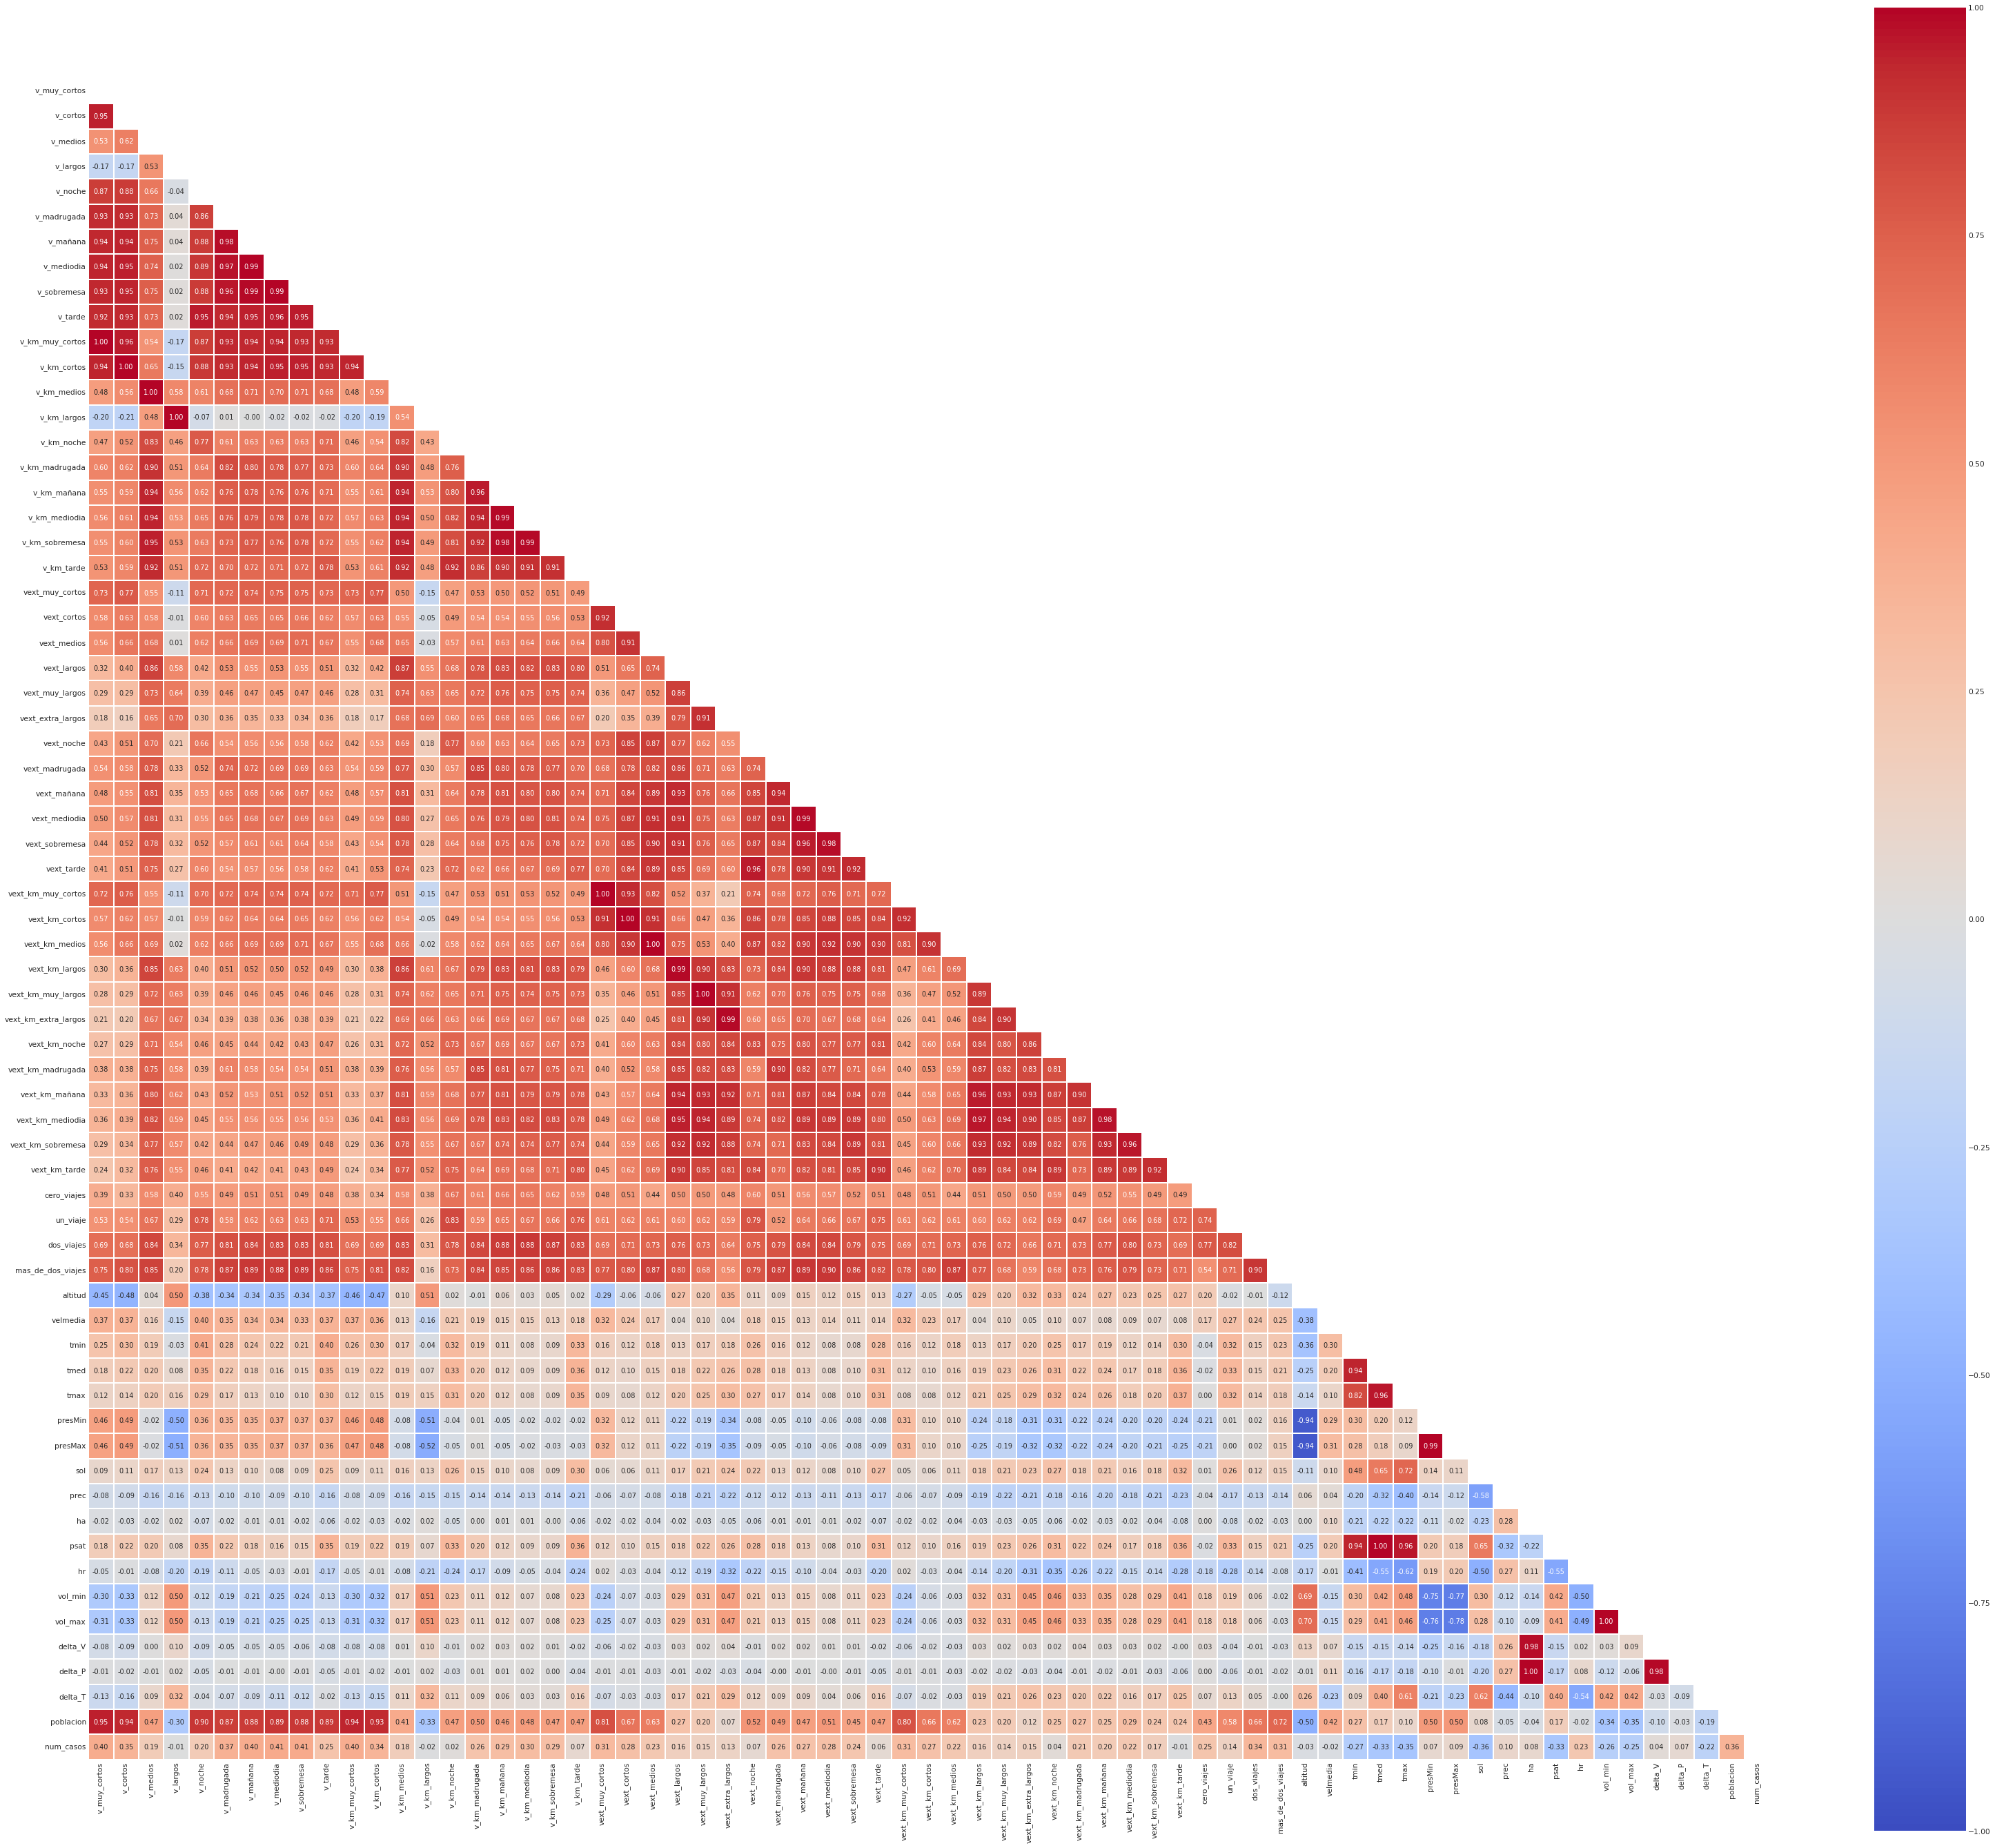

In [20]:
corr = datos.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(50, 50),dpi= 70)
    ax =sns.heatmap(corr, cmap="coolwarm", mask=mask, linewidths=.1, robust=True,
                     vmax=1.0, vmin=-1.0, square=True, annot=True, fmt=".2f")  # cmap="coolwarm"YlOrRd

In [21]:
from scipy.stats import spearmanr

In [22]:
plt.rcParams.update({'figure.figsize':(10, 10), 'figure.dpi':70}) # tamño de los plots

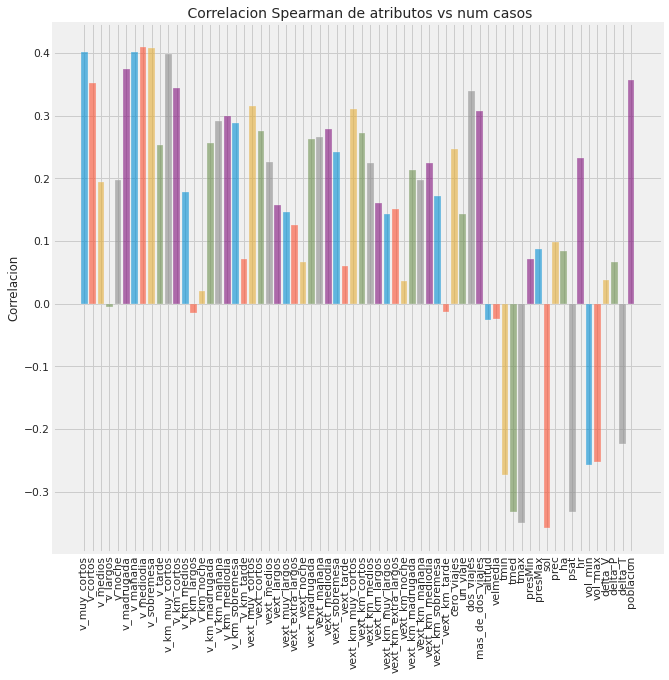

In [23]:
corr_spearmanr = []

for atributo in datos.columns:
    corr_spearmanr.append(spearmanr(datos[atributo], datos.num_casos))

for i in np.arange(0, len(np.arange(datos.drop(columns=['num_casos']).shape[1]))):
    plt.bar(np.arange(datos.drop(columns=['num_casos']).shape[1])[i],
            corr_spearmanr[i][0], align='center', alpha=0.6)

plt.xticks(np.arange(datos.drop(columns=['num_casos']).shape[1]),
           datos.drop(columns=['num_casos']), rotation=90)
plt.ylabel('Correlacion')
plt.title(' Correlacion Spearman de atributos vs num casos')

plt.show()

**Correlacion viajes por periodos**

**Correlación viajeros por periodos**